In [1]:
from utils import functions, pathways_functions, complete_tests
from collections import defaultdict
import random
from itertools import product
import os
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [4]:
base_path = '/Users/niccolodepaolis/PycharmProjects/Thesis/pathways/temp/second'
complete_results = []

In [3]:
total_species = 0
correct_species = 0
uncertain_species = 0
graph_directory = '/Users/niccolodepaolis/PycharmProjects/Thesis/pathways/temp/second'
tested_graphs = 0
true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0
uncertain = []  # The species whose results are between bounds: store the absolute delta and the compound one
statistics_deltas = []  # Store both deltas for every specie in order to have a statistic about magnitudes
# Stores the accuracy for each PW (each experiment individually) the key is the graph number
pathways_results = defaultdict(lambda: [])

for graph in list(os.listdir(graph_directory)):

    # Stores the total number of species classified for this PW (all experiments)
    total_count_pw = 0
    correct_count_pw = 0

    # Results for each experiment: the key is the experiment number 
    # Results include: accuracy and two arrays: correct and incorrect species
    pathway_results = defaultdict(lambda: {})

    print("TESTED GRAPHS ", tested_graphs)
    tested_graphs += 1
    can_complete = False

    if graph == '.DS_Store': continue
    for experiment in list(os.listdir(os.path.join(graph_directory, graph))):

        if experiment == '.DS_Store': continue
        print('GRAPH: ', graph, ' EXPERIMENT: ', experiment, ' DIRECTORY: ', str(experiment))

        res = complete_tests.complete_tests2(
            os.path.join(graph_directory, graph, experiment, 'normal.xml'),
            os.path.join(graph_directory, graph, experiment, 'altered.xml'),
            os.path.join(graph_directory, graph, experiment, 'description'),
            []
        )

        complete_results.append(res)

        insights, all, uncertain, d_normal, d_uncertain = complete_tests.get_insights_confidence_intervals('altered',
                                                                                                           res, 0,
                                                                                                           detailed_classification=True,
                                                                                                           threshold=0,
                                                                                                           ignore_uncertain=False)

        total_species += all  # Whole-class level
        uncertain_species += uncertain

        # Experimet-level
        total_count = 0
        correct_count = 0
        correct_species_list = []
        wrong_species_list = []

        for specie in insights.keys():

            if insights[specie][0] == 0 or insights[specie][1][1] == 0.5:
                continue

            total_count += 1
            if insights[specie][0] == insights[specie][1][0]:
                correct_count += 1
                correct_species += 1  # Whole-class level
                #correct_species_list.append(specie)
            #else:
            #wrong_species_list.append(specie)

            if insights[specie][1][0] == insights[specie][0] == 1:
                correct_species_list.append([specie, {'predicted': 1, 'actual': 1}])
                true_positives += 1
            elif insights[specie][1][0] == insights[specie][0] == -1:
                correct_species_list.append([specie, {'predicted': -1, 'actual': -1}])
                true_negatives += 1
            elif insights[specie][1][0] == 1 and insights[specie][0] == -1:
                wrong_species_list.append([specie, {'predicted': 1, 'actual': -1}])
                false_positives += 1
            elif insights[specie][1][0] == -1 and insights[specie][0] == 1:
                wrong_species_list.append([specie, {'predicted': -1, 'actual': 1}])
                false_negatives += 1

        desc_file = open(os.path.join(graph_directory, graph, experiment, 'description'), 'rb')
        desc = pickle.load(desc_file)
        desc_file.close()

        print('ALTERED REACTION: ', desc['altered'])
        print('CORRECT, TOTAL, RATIO: ', correct_count, total_count, correct_count / total_count)

        pathway_results[experiment]['ratio'] = correct_count / total_count
        pathway_results[experiment]['correct_species'] = correct_species_list
        pathway_results[experiment]['wrong_species'] = wrong_species_list
        pathway_results[experiment]['altered'] = desc['altered']
        #pathway_scores.append(correct_count / total_count)
    #pathways_scores.append(pathway_scores)
    pathways_results[graph] = pathway_results


TESTED GRAPHS  0
GRAPH:  18  EXPERIMENT:  2645  DIRECTORY:  2645
ALTERED REACTION:  R8
CORRECT, TOTAL, RATIO:  12 12 1.0
GRAPH:  18  EXPERIMENT:  2642  DIRECTORY:  2642
ALTERED REACTION:  R2
CORRECT, TOTAL, RATIO:  12 12 1.0
GRAPH:  18  EXPERIMENT:  2689  DIRECTORY:  2689
ALTERED REACTION:  R12
CORRECT, TOTAL, RATIO:  9 12 0.75
GRAPH:  18  EXPERIMENT:  2674  DIRECTORY:  2674
ALTERED REACTION:  Rr10
CORRECT, TOTAL, RATIO:  12 12 1.0
GRAPH:  18  EXPERIMENT:  2680  DIRECTORY:  2680
ALTERED REACTION:  R8
CORRECT, TOTAL, RATIO:  12 12 1.0
GRAPH:  18  EXPERIMENT:  2687  DIRECTORY:  2687
ALTERED REACTION:  Rr8
CORRECT, TOTAL, RATIO:  9 12 0.75
GRAPH:  18  EXPERIMENT:  2673  DIRECTORY:  2673
ALTERED REACTION:  Rr8
CORRECT, TOTAL, RATIO:  6 12 0.5
GRAPH:  18  EXPERIMENT:  2672  DIRECTORY:  2672
ALTERED REACTION:  R6
CORRECT, TOTAL, RATIO:  12 12 1.0
GRAPH:  18  EXPERIMENT:  2686  DIRECTORY:  2686
ALTERED REACTION:  Rr6
CORRECT, TOTAL, RATIO:  12 12 1.0
GRAPH:  18  EXPERIMENT:  2681  DIRECTORY: 

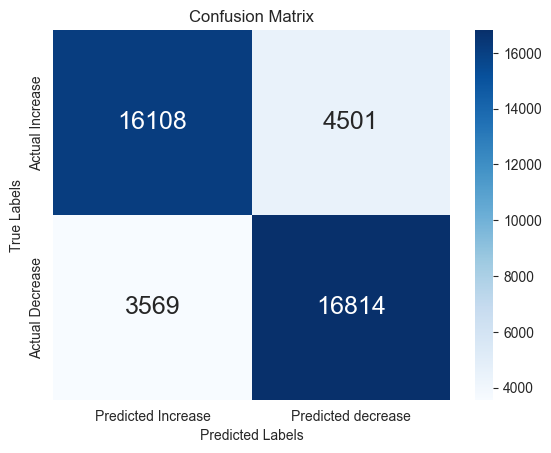

In [4]:
 import seaborn as sns
import pandas as pd

confusion_matrix = [[true_positives, false_positives], [false_negatives, true_negatives]]
# Convert to DataFrame for seaborn
confusion_df = pd.DataFrame(confusion_matrix, index=['Actual Increase', 'Actual Decrease'], columns=['Predicted Increase', 'Predicted decrease'])

# Plot confusion matrix heatmap
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues", annot_kws={'size': 18})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [5]:
print('total species: ', total_species, 'correct soecues: ', correct_species, 'uncertain: ', uncertain_species)

total species:  40992 correct soecues:  32922 uncertain:  569


In [6]:
graph = '16'
ratios = {}

for graph, r in pathways_results.items():
    
    list_ratios = []
    for exp in pathways_results[graph].values():
        list_ratios.append(exp['ratio'])
        
    ratios[graph] = list_ratios
    
ratios

{'18': [1.0,
  1.0,
  0.75,
  1.0,
  1.0,
  0.75,
  0.5,
  1.0,
  1.0,
  1.0,
  0.5,
  1.0,
  1.0,
  1.0,
  1.0,
  0.5,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.8333333333333334,
  0.9166666666666666,
  1.0,
  1.0,
  1.0,
  1.0,
  0.75,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.25,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.4166666666666667,
  0.75,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9166666666666666,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.3333333333333333,
  1.0,
  1.0,
  1.0,
  1.0,
  0.3333333333333333,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9166666666666666,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9166666666666666,
  1.0,
  1.0,
  1.0,
  0.75,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.16666666666666666,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0

In [3]:
import matplotlib.pyplot as plt

def plot_boxplots(data_dict):
    """
    Generate box plots for each key in the dictionary.

    Parameters:
    - data_dict (dict): A dictionary with keys as labels and values as lists or arrays of numbers.
    """
    labels = list(data_dict.keys())
    data = [data_dict[label] for label in labels]

    plt.figure(figsize=(15, 6))  # Adjust size depending on how readable you want it
    plt.boxplot(data, labels=labels, vert=True)
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.title("Box Plot accuracy per pathway medium class not conserving")
    plt.ylabel("Ratio")
    plt.xlabel("Pathway #")
    plt.ylim(bottom=0)
    plt.tight_layout()
    plt.show()


In [8]:
base_path = '/Users/niccolodepaolis/PycharmProjects/Thesis/pathways/temp/second'
for pw in pathways_results.keys():
    pw_path = os.path.join(base_path, pw)
    for exp in pathways_results[pw].keys():
        res_path = os.path.join(pw_path, exp, 'results')
        res_file = open(res_path, 'wb')
        pickle.dump(pathways_results[pw][exp], res_file)
        res_file.close()

## Retrieve results

In [2]:
base_path = '/Users/niccolodepaolis/PycharmProjects/Thesis/pathways/temp/second'
res_pathways = defaultdict(lambda : [])
for pw in os.listdir(base_path):
    if pw == '.DS_Store': continue
    res = defaultdict(lambda : {})
    pw_path = os.path.join(base_path, pw)
    for exp in os.listdir(pw_path):
        if exp == '.DS_Store': continue
        res_path = os.path.join(pw_path, exp, 'results')
        res_file = open(res_path, 'rb')
        r = pickle.load(res_file)
        res_file.close()
        res[exp] = r
    res_pathways[pw] = res

/var/folders/rf/48x9qng97nl7d1b1_vbww4t80000gn/T/ipykernel_47177/1650975037.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, vert=True)


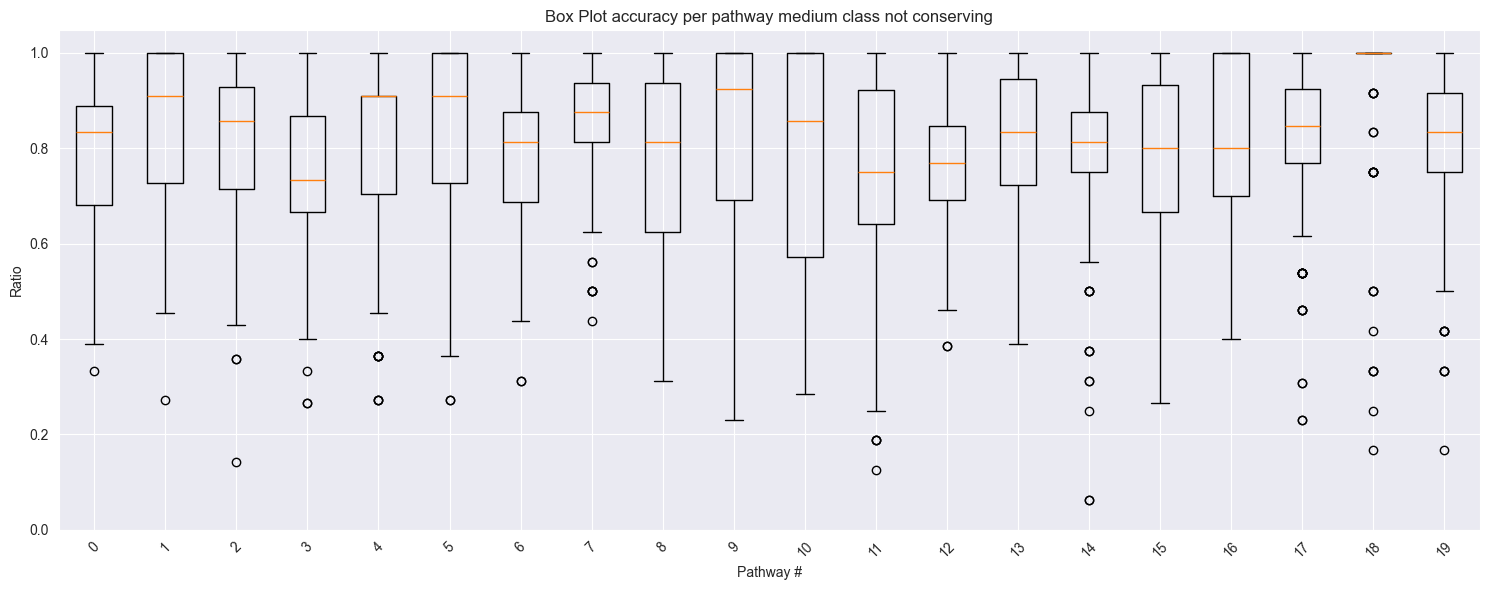

In [4]:
ratios = {}

for graph, r in res_pathways.items():
    
    list_ratios = []
    for exp in res_pathways[graph].values():
        list_ratios.append(exp['ratio'])
        
    ratios[graph] = list_ratios
    
sorted_ratios = dict(sorted(ratios.items(), key=lambda item: int(item[0])))
plot_boxplots(sorted_ratios)

In [9]:
experiments = 0
scores = []
for i in range(len(pathways_scores)):
    print(i, np.average(pathways_scores[i]), np.std(pathways_scores[i]))
    experiments += len(pathways_scores[i])
    scores.append(np.average(pathways_scores[i]))
print(np.average(scores), np.std(scores))

NameError: name 'pathways_scores' is not defined

In [7]:
print('total experiments: ', total_species, 'correct experiments: ', correct_species, 'ratio: ', correct_species/total_species)
print('pathway score: ', pathways_scores)
print('true positives: ', true_positives, 'false_positivies', false_positives)
print('true negatives: ', true_negatives, 'false negatives', false_negatives)

total experiments:  3990 correct experiments:  3205 ratio:  0.8032581453634086
pathway score:  [[0.8055555555555556, 0.8055555555555556, 0.8333333333333334, 0.8333333333333334, 0.8055555555555556, 0.8055555555555556, 0.7222222222222222, 0.8611111111111112, 0.8611111111111112, 0.7222222222222222], [1.0, 0.9523809523809523, 1.0, 1.0, 0.9523809523809523, 1.0, 1.0, 0.9523809523809523, 0.9523809523809523, 1.0], [0.6976744186046512, 0.8837209302325582, 0.8837209302325582, 0.6976744186046512, 0.7674418604651163, 0.9302325581395349, 0.8604651162790697, 0.8604651162790697, 0.9302325581395349, 0.7674418604651163], [0.7804878048780488, 0.3170731707317073, 0.36585365853658536, 0.36585365853658536, 0.3170731707317073, 0.7804878048780488, 0.6585365853658537, 0.6585365853658537, 0.6585365853658537, 0.6585365853658537], [0.7567567567567568, 0.7837837837837838, 0.8648648648648649, 0.7567567567567568, 0.7837837837837838, 0.7567567567567568, 0.8378378378378378, 0.8648648648648649, 0.7567567567567568, 0.8

In [7]:
import math
absolute_deltas = [math.fabs(delta[0]) for delta in statistics_deltas]
compound_deltas = [delta[1] for delta in statistics_deltas]
absolute_deltas_uncertain = [math.fabs(delta[0][0]) for delta in uncertain]
compound_delta_uncertain = [delta[0][1] for delta in uncertain]
print('Average absolute delta: ', np.mean(absolute_deltas))
print('Average compound delta: ', np.mean(compound_deltas))
print('Average absolute delta uncertain: ', np.mean(absolute_deltas_uncertain))
print('Average compound delta uncertain: ', np.mean(compound_delta_uncertain))

Average absolute delta:  0.21626818897927935
Average compound delta:  0.22748354913067761
Average absolute delta uncertain:  0.10275142173812472
Average compound delta uncertain:  0.06653559687702301


In [9]:
print('total experiments: ', total_count, 'correct experiments: ', correct_count, 'ratio: ', correct_count/total_count)
print('pathway score: ', pathways_scores)
print('true positives: ', true_positives, 'false_positivies', false_positives)
print('true negatives: ', true_negatives, 'false negatives', false_negatives)
print('uncertain', uncertain)

total experiments:  3990 correct experiments:  3281 ratio:  0.8223057644110275
pathway score:  [0.8277777777777777, 0.9714285714285714, 0.8, 0.6634146341463415, 0.7891891891891892, 0.85, 0.7416666666666667, 0.8604651162790697, 0.861904761904762, 0.841025641025641]
true positives:  1629 false_positivies 305
true negatives:  1652 false negatives 290
uncertain [[[-0.0019504785554964321, 2.898721764118356e-05]], [[0.0029484638755046255, 4.98424133310642e-06]], [[-0.033962006865128735, 0.0009561367837300543]], [[-0.05215373430595549, 0.0014682908456157646]], [[-0.04002457641935803, 0.004459782696425211]], [[-0.04661731693918694, 0.010818104892657422]], [[-0.5083040515202016, 0.17370362693177197]], [[0.046617319473264335, 0.01408721194530503]], [[0.052744557452441776, 0.015938792023852837]], [[0.5083040589804726, 0.2638797028015386]], [[0.03396197372429577, 0.0009838328649030498]], [[0.0521536834132561, 0.0015108223151060218]], [[0.04002456310860114, 0.0050190305774640166]], [[0.001950479744

In [6]:
tested_graphs = 0
for graph in list(os.listdir(graph_directory)):
    print("TESTED GRAPHS", tested_graphs)
    if graph == '.DS_Store': continue
    for experiment in list(os.listdir(os.path.join(graph_directory, graph))):
        res = complete_tests.complete_tests2(
            os.path.join(graph_directory, graph, experiment, 'normal.xml'),
            os.path.join(graph_directory, graph, experiment, 'altered.xml'),
            os.path.join(graph_directory, graph, experiment, 'description'),
            []
        )
        
        results = complete_tests.get_insigths('altered', res, 0)
        
        insights = sorted(results[0], key= lambda x: x[1])
        perfect_configurations = []
        
        for insight in insights:
            if insight[1] == 0:
                perfect_configurations.append(insight[0])
        
        complete_results[graph].append([experiment, results[1], perfect_configurations])

TESTED GRAPHS 0
TESTED GRAPHS 0
TESTED GRAPHS 0
TESTED GRAPHS 0
TESTED GRAPHS 0
TESTED GRAPHS 0
TESTED GRAPHS 0
TESTED GRAPHS 0
TESTED GRAPHS 0
TESTED GRAPHS 0
TESTED GRAPHS 0


In [6]:
graph = '3'
for experiment in complete_results[graph]:
        print("graph: ", graph, 
              ' experiment: ', experiment[0], 
              'ratio correct species: ', experiment[1],
              ' # perfect configurations: ', len(experiment[2])
              )

TypeError: list indices must be integers or slices, not str